In [128]:
from Miscellaneous import Plot, FetchData
from Portfolio import MeanVariance
import pandas as pd
import yfinance as yf
from Statistics import stationaryTest
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
symbols_list = ['^VVIX','^GSPC','^VIX']
startDate = "2007-01-01"
endDate = "2021-06-01"
window=20

In [114]:
stock_data = yf.download(symbols_list, start=startDate, end=endDate)
prices = stock_data["Adj Close"].dropna()[symbols_list]
print(prices.shape)
prices.head()

[*********************100%***********************]  3 of 3 completed
(3618, 3)


,^VVIX,^GSPC,^VIX
Date,,,
2007-01-03,87.629997,1416.599976,12.04
2007-01-04,88.190002,1418.339966,11.51
2007-01-05,90.169998,1409.709961,12.14
2007-01-08,92.040001,1412.839966,12.00
2007-01-09,92.760002,1412.109985,11.91


<AxesSubplot:xlabel='Date'>

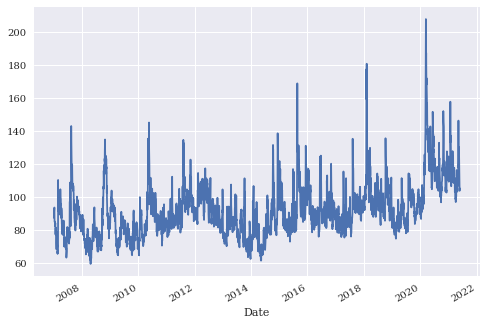

In [20]:
prices['^VVIX'].plot()

In [22]:
stationaryTest(prices['^VVIX'])

ADF Statistic: -6.969937
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [115]:
stationaryTest(prices['^VIX'])

ADF Statistic: -4.756997
p-value: 0.000066
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


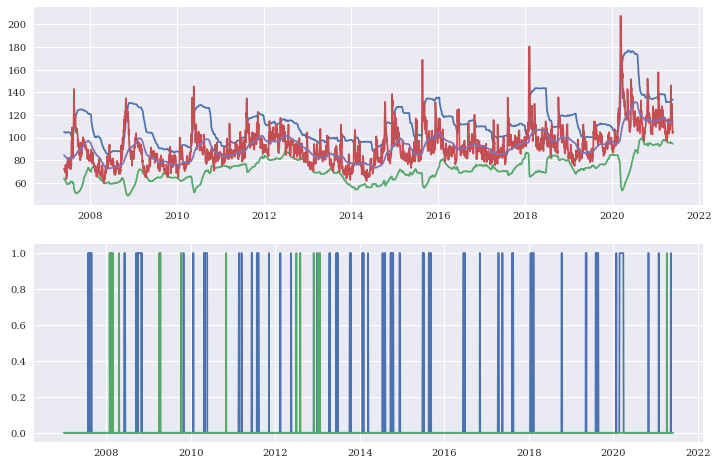

In [107]:
vvixDf = pd.DataFrame(index=prices.index)
vvixDf['vvix'] = prices['^VVIX']

indicator_bb = BollingerBands(close=vvixDf['vvix'], window=100, window_dev=2)
vvixDf['bb_bbm'] = indicator_bb.bollinger_mavg()
vvixDf['bb_bbh'] = indicator_bb.bollinger_hband()
vvixDf['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
vvixDf['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
vvixDf['bb_bbli'] = indicator_bb.bollinger_lband_indicator()
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
ax[0].plot(vvixDf[['bb_bbh','bb_bbl','vvix','bb_bbm']].dropna())
ax[1].plot(vvixDf[['bb_bbhi','bb_bbli']].dropna())

In [120]:
def regime(row):
    if row[0] > row['bb_bbh']:
        return 1
    elif row[0] < row['bb_bbh'] and row[0] > row['bb_bbm']:
        return 0
    else:
        return 0 #can return low vol regime
vvixDf = vvixDf.dropna()
vvixDf['regime'] = vvixDf.apply(lambda x:regime(x),axis=1)  
vvixDf

,vvix,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,regime
Date,,,,,,,
2007-05-25,72.419998,84.4174,104.985058,63.849743,0.0,0.0,0
2007-05-29,72.480003,84.2659,104.959473,63.572328,0.0,0.0,0
2007-05-30,71.610001,84.1001,104.930485,63.269716,0.0,0.0,0
2007-05-31,72.199997,83.9204,104.848049,62.992751,0.0,0.0,0
2007-06-01,70.190002,83.7019,104.741847,62.661954,0.0,0.0,0
...,...,...,...,...,...,...,...
2021-05-21,124.220001,114.4505,133.845774,95.055226,0.0,0.0,0
2021-05-24,116.120003,114.3956,133.740516,95.050685,0.0,0.0,0
2021-05-26,106.290001,114.2528,133.624101,94.881500,0.0,0.0,0


Text(0, 0.5, 'regime')

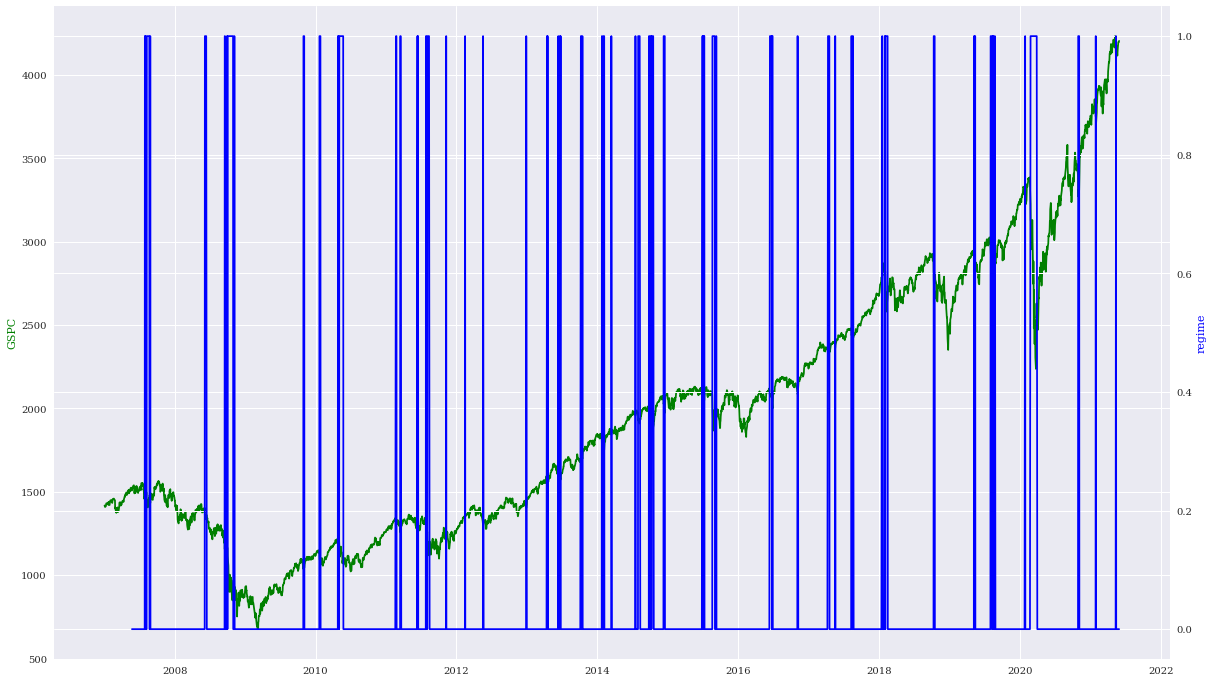

In [121]:
fig, ax1 = plt.subplots(figsize=(20,12))

ax2 = ax1.twinx()
ax1.plot(prices['^GSPC'], 'g-')
ax2.plot(vvixDf['regime'], 'b-')

ax1.set_ylabel('GSPC', color='g')
ax2.set_ylabel('regime', color='b')

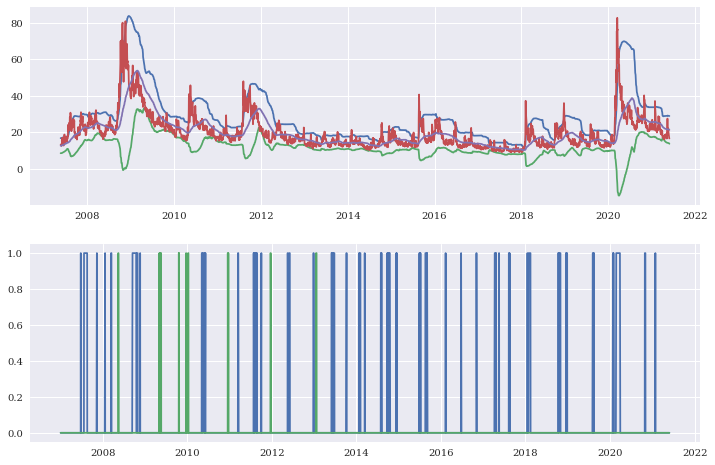

In [122]:
vix = pd.DataFrame(index=prices.index)
vix['vix'] = prices['^VIX']

indicator_bb = BollingerBands(close=vix['vix'], window=100, window_dev=2)
vix['bb_bbm'] = indicator_bb.bollinger_mavg()
vix['bb_bbh'] = indicator_bb.bollinger_hband()
vix['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
vix['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
vix['bb_bbli'] = indicator_bb.bollinger_lband_indicator()
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12,8))
ax[0].plot(vix[['bb_bbh','bb_bbl','vix','bb_bbm']].dropna())
ax[1].plot(vix[['bb_bbhi','bb_bbli']].dropna())

Text(0, 0.5, 'regime')

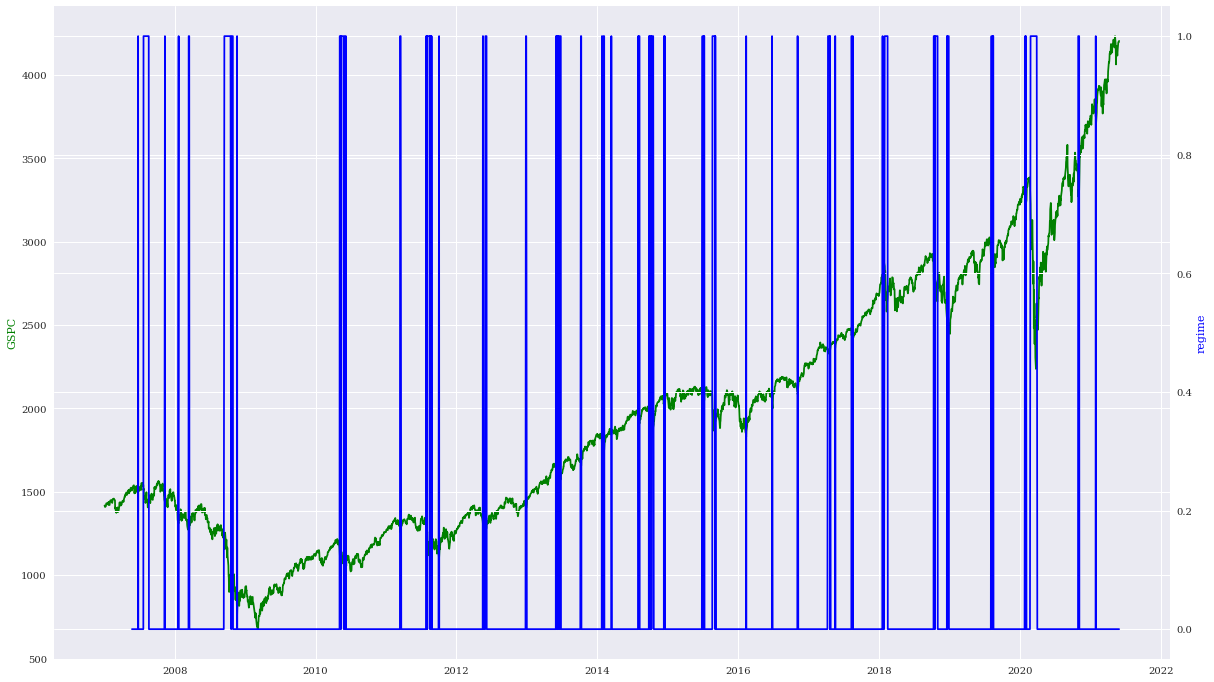

In [124]:
vix = vix.dropna()
vix['regime'] = vix.apply(lambda x:regime(x),axis=1)  
fig, ax1 = plt.subplots(figsize=(20,12))

ax2 = ax1.twinx()
ax1.plot(prices['^GSPC'], 'g-')
ax2.plot(vix['regime'], 'b-')

ax1.set_ylabel('GSPC', color='g')
ax2.set_ylabel('regime', color='b')

Text(0, 0.5, 'regime')

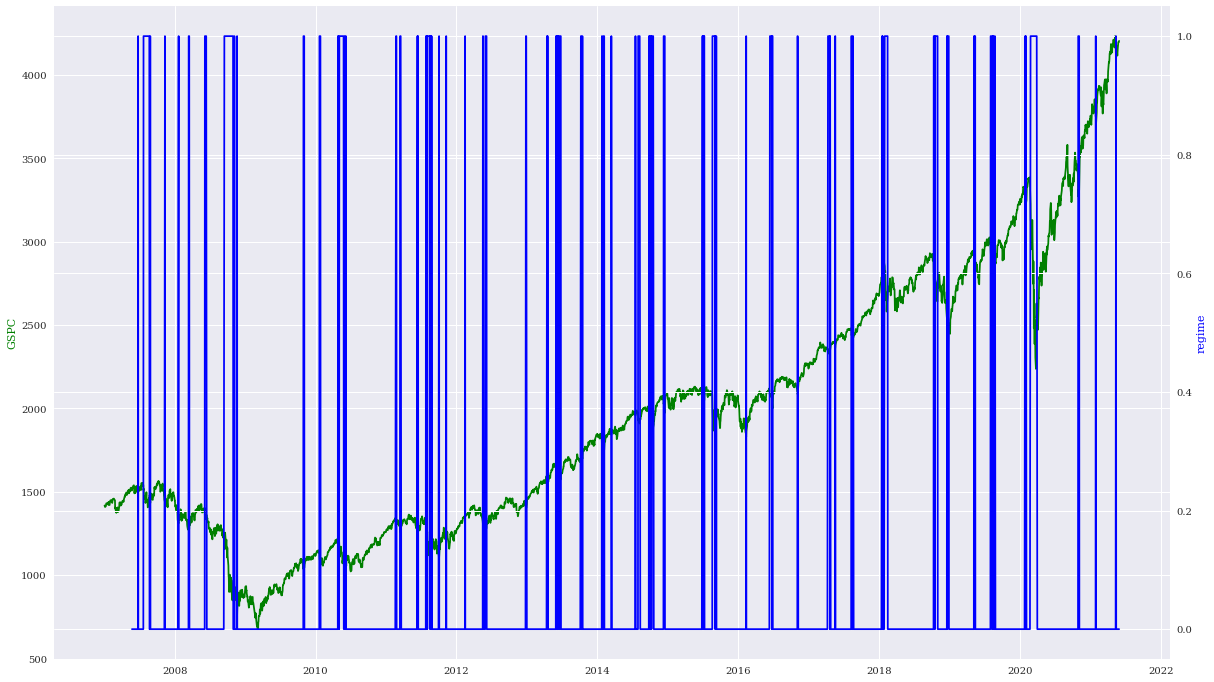

In [135]:
fig, ax1 = plt.subplots(figsize=(20,12))

combinedRegime = pd.DataFrame(index=vix.index)
combinedRegime['regime'] = (vix['regime']+vvixDf['regime'])
combinedRegime[combinedRegime['regime']>0] = 1
ax2 = ax1.twinx()
ax1.plot(prices['^GSPC'], 'g-')
ax2.plot(combinedRegime['regime'], 'b-')

ax1.set_ylabel('GSPC', color='g')
ax2.set_ylabel('regime', color='b')

In [134]:
combinedRegime.nunique()

regime    2
dtype: int64